## Clinical variables
* no missing info:'gender', 'Age', 'GFR_CKD_EPI'
* with missing info: other columns
* disease: 'Diabetes/Obesity/metabolic syndrome', 'Chronic kidney disease', 'CVD/Hypertension', 'Other diseases'
* egfr_group: four groups from 0 (mildest) to 3 (most severe) with eGFR cut-pff at 30, 60, 90


In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
import scipy.stats as stats

from set_path import *

In [ ]:
df1=pd.read_csv(f2+'Tianlin_GFR_CKD_EPI_cleaned_20201005.csv',index_col=0)

### Number of missing variables

In [63]:
print (df1.columns.tolist())
len(df1)-df1.count()

['OrigID', 'gender', 'Age', 'BMI', 'first_name_of_the_physician', 'name_of_the_physician', 'fidStudie', 'GFR_CKD_EPI', 'Blutdruck, diastolisch', 'Blutdruck, systolisch', 'S_Kreatinin', 'U_Albumin', 'Diabetes/Obesity/metabolic syndrome', 'Chronic kidney disease', 'CVD/Hypertension', 'Other diseases', 'acr', 'normalalbuminuria', 'microalbuminuria', 'macroalbuminuria', 'egfr_group']


OrigID                                  259
gender                                    0
Age                                       0
BMI                                    2130
first_name_of_the_physician               0
name_of_the_physician                     0
fidStudie                                 0
GFR_CKD_EPI                               0
Blutdruck, diastolisch                 1742
Blutdruck, systolisch                  1721
S_Kreatinin                            1486
U_Albumin                              3848
Diabetes/Obesity/metabolic syndrome    4567
Chronic kidney disease                 6526
CVD/Hypertension                       6181
Other diseases                         7518
acr                                    6348
normalalbuminuria                      6348
microalbuminuria                       6348
macroalbuminuria                       6348
egfr_group                                0
dtype: int64

### Distribution of the variables
* 'GFR_CKD_EPI', 'Age' and log-transformed 'acr' are quasi-normal

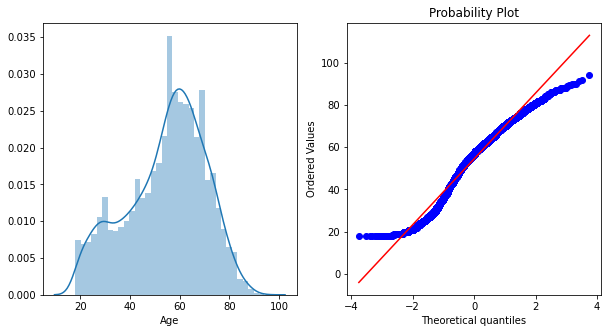

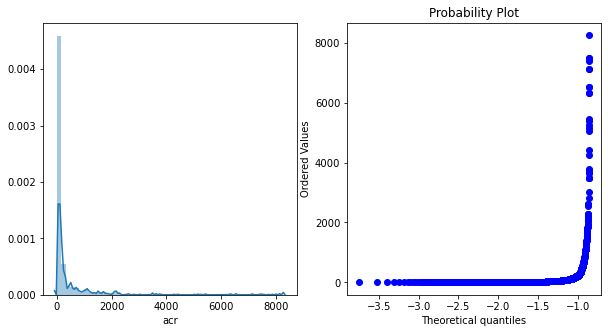

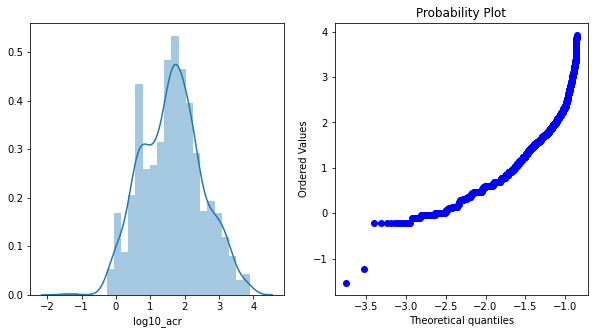

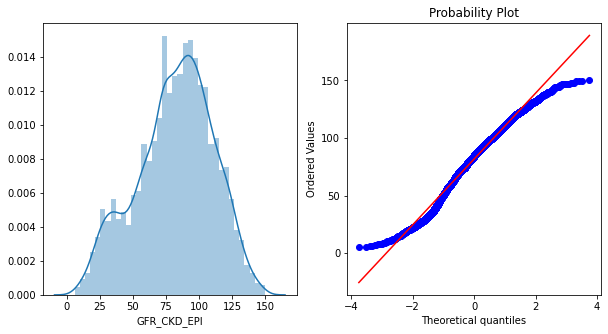

In [68]:
# distribution of age, acr, log10(acr), eGFR
var_conti=['Age','acr','log10_acr','GFR_CKD_EPI']
df1['log10_acr']=np.log10(df1['acr'])
for i in var_conti:
    fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.distplot(df1[i],ax=ax0)
    stats.probplot(df1[i], dist="norm",plot=plt)
    plt.show()

### disease pattern according to sex    

In [60]:
# number of diseases grouped by sex intraining
df1.groupby('gender').agg({'Age':'count',
                               'Diabetes/Obesity/metabolic syndrome':'sum',
                              'Chronic kidney disease':'sum',
                              'CVD/Hypertension':'sum',
                              }).rename({'Age':'count'},axis=1)

,count,Diabetes/Obesity/metabolic syndrome,Chronic kidney disease,CVD/Hypertension
gender,,,,
0,3796,1468.0,916.0,649.0
1,4103,1829.0,457.0,1036.0


## ANOVA: go to [R](http://localhost:8787/)
* The groups are not balanced even after mnp of age and sex
* Voilation of ANOVA's assumption

## Linear regression
1. We can try linear regression with correction of potential confounders for ALL peptides
    * choice of confounders can be data-independent or data-dependent
    * For each peptide $P_i$, we test
$$
ß_iP_i+ß_0+ß_1X_i+...=eGFR
$$
    
2. Examine if assumptions of linear regression are fulfilled by checking the **residues**
3. Correct significance level by multiple testing
We can first look at peptides which fulfilled the assumptions AND significantly with eGFR
Then, we can explore those non-linear peptides